#Pre-requisites

In [ ]:
import pickle
from google.colab import drive
import os

drive.mount("/content/drive", force_remount=True)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Dissertation/Training and Eval/out.pkl', 'rb') as handle:
    out = pickle.load(handle)

In [ ]:
temp_o = out
out = out[:600]

len(out)

600

##Defining the model paths

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Dissertation/Predictions/all_wgt0-10.pkl', 'rb') as handle:
    all_wgt0 = pickle.load(handle)

with open('/content/drive/MyDrive/Colab Notebooks/Dissertation/Predictions/all_wgt1-10.pkl', 'rb') as handle:
    all_wgt1 = pickle.load(handle)

with open('/content/drive/MyDrive/Colab Notebooks/Dissertation/Predictions/rel_wgt10.pkl', 'rb') as handle:
    rel_wgt = pickle.load(handle)

with open('/content/drive/MyDrive/Colab Notebooks/Dissertation/Predictions/baseline10.pkl', 'rb') as handle:
    baseline = pickle.load(handle)

with open('/content/drive/MyDrive/Colab Notebooks/Dissertation/Predictions/indi10.pkl', 'rb') as handle:
    indi = pickle.load(handle)

##Evaluation Metrics

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

def metrics(data):
  mcc, prec, rec, f1=[], [], [], []
  for i in range(len(data)):
    prec.append(precision_score(out, data[i], pos_label='true'))
    rec.append(recall_score(out, data[i], pos_label='true'))
    f1.append(f1_score(out, data[i], pos_label='true'))
    mcc.append(matthews_corrcoef(out, data[i]))
    
  return prec, rec, f1, mcc

In [ ]:
prec_rel, rec_rel, f1_rel, mcc_rel = metrics(rel_wgt)
prec_all0, rec_all0, f1_all0, mcc_all0 = metrics(all_wgt0)
prec_all1, rec_all1, f1_all1, mcc_all1 = metrics(all_wgt1)
prec_base, rec_base, f1_base, mcc_base = metrics(baseline)
prec_indi, rec_indi, f1_indi, mcc_indi = metrics(indi)

Text(0.5, 1.0, 'All Weights (NR=0) [AW_NR0]')

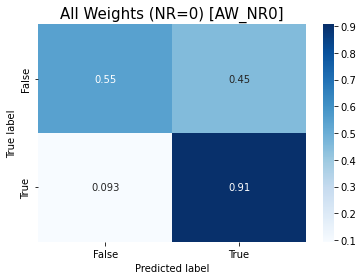

In [ ]:
#Confusion matrix
columns =['False', 'True']
conf_mat = confusion_matrix(out, all_wgt0[0])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(conf_mat_normalized, index=columns, columns=columns)
s = sns.heatmap(df_cm, cmap='Blues', annot=True)
s.set_xlabel('Predicted label', fontsize=10)
s.set_ylabel('True label', fontsize=10)
s.set_title('All Weights (NR=0) [AW_NR0]', fontsize=15)

    Iterations              Models  Precision    Recall  F1 Score       MCC
0            1  All Weights (NR=0)   0.133562  0.906977  0.232836  0.233647
1            2  All Weights (NR=0)   0.093093  0.720930  0.164894  0.092770
2            3  All Weights (NR=0)   0.096970  0.744186  0.171582  0.108452
3            4  All Weights (NR=0)   0.115207  0.581395  0.192308  0.127062
4            5  All Weights (NR=0)   0.086826  0.674419  0.153846  0.065859
5            6  All Weights (NR=0)   0.073418  0.674419  0.132420  0.009423
6            7  All Weights (NR=0)   0.084932  0.720930  0.151961  0.064092
7            8  All Weights (NR=0)   0.111607  0.581395  0.187266  0.119518
8            9  All Weights (NR=0)   0.093484  0.767442  0.166667  0.101120
9           10  All Weights (NR=0)   0.112281  0.744186  0.195122  0.149773
10           1  All Weights (NR=1)   0.138408  0.930233  0.240964  0.249434
11           2  All Weights (NR=1)   0.165254  0.906977  0.279570  0.292155
12          

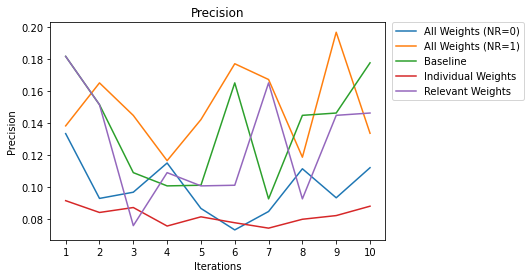

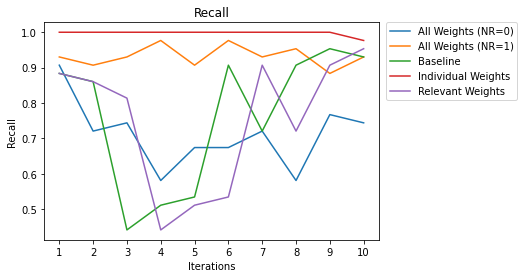

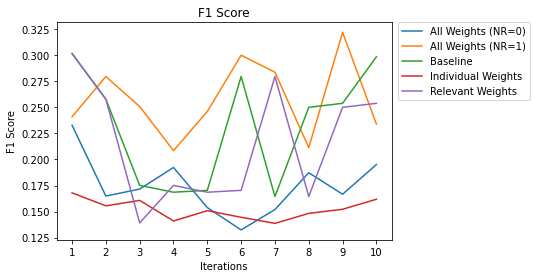

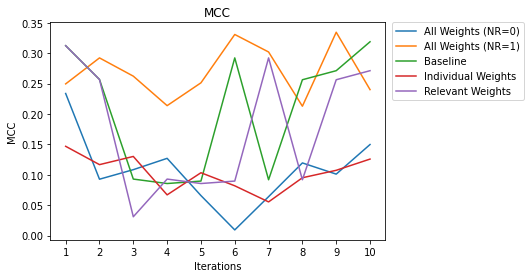

<Figure size 1440x864 with 0 Axes>

In [ ]:
#Creating pandas dataframe to easily extract information to create the graphs
all_prec = prec_all0 + prec_all1 + prec_base + prec_indi + prec_rel
all_rec = rec_all0 + rec_all1 + rec_base + rec_indi + rec_rel
all_f1 = f1_all0 + f1_all1 + f1_base + f1_indi + f1_rel
all_mcc = mcc_all0 + mcc_all1 + mcc_base + mcc_indi + mcc_rel

epochs = [1,2,3,4,5,6,7,8,9,10] * 5
models = ['Baseline', 'All Weights (NR=0)', 'All Weights (NR=1)', 'Relevant Weights', 'Individual Weights'] * 10
models.sort()
data=pd.DataFrame(list(zip(epochs, models, all_prec, all_rec, all_f1, all_mcc)),
               columns =['Iterations', 'Models', 'Precision', 'Recall', 'F1 Score', 'MCC'])

print(data)

 

sns.lineplot(x = "Iterations", y = "Precision", data = data, hue = "Models")
plt.title('Precision')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Dissertation/Results/prec.png')
plt.show()

sns.lineplot(x = "Iterations", y = "Recall", data = data, hue = "Models")
plt.title('Recall')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Dissertation/Results/rec.png')
plt.show()

sns.lineplot(x = "Iterations", y = "F1 Score", data = data, hue = "Models")
plt.title('F1 Score')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Dissertation/Results/f1.png')
plt.show()

sns.lineplot(x = "Iterations", y = "MCC", data = data, hue = "Models")
plt.title('MCC')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.figure(figsize = (20,12))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Dissertation/Results/mcc.png')
plt.show()